# CSC 635
# Assignment : hw4
# Author: Rafail Islam

In [1]:
#----------------------------------------import-----------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Read data from txt file
train = np.loadtxt("train.txt")
test = np.loadtxt("test.txt")
Xtrain , ytrain = train[:,:-1],train[:,-1]
Xtest, ytest  = test[:,:-1],test[:,-1]

In [3]:
# class for percetron model
class Perceptron(object):

    def __init__(self, no_of_inputs,  learning_rate=0.01):
        """ this constructor initialize variables
        """
        self.learning_rate = learning_rate
        self.weights = 1.0 * np.random.randint(-10,10, size=no_of_inputs)
        self.bias = 1.0 * np.random.randint(-10,10, size=1)
      
    
    def activation(self,summation):
        """ thresold activation function.
        """
        return  1. if summation > 0 else -1.
           
    def predict(self, inputs):
        """ This function calculate summataion for a given input
        and return its label prediction by using activation function.
        """
        # Calculate summation [x*w+b]
        summation = np.dot(inputs, self.weights) + self.bias[0]
        # Make prediction
        prediction =  self.activation(summation)    
        
        return prediction

    def train(self, Xtrain, ytrain):
        """ this function takes train dataset and train the perceptron.
        """
        i = 0
        # Repeat Train loop untill all inputs are correctly classified
        while True:
            
            classified = 0
            # Train for all inputs in train data set
            for x, y_actual in zip(Xtrain, ytrain):
                
                # Determine predict ouput
                y_pred = self.predict(x)
                
                # If  miss classified : update weights and bias
                if y_pred != y_actual :
                    # Update weights
                    self.weights += self.learning_rate * (y_actual - y_pred) * x
                    # Update bias
                    self.bias[0] += self.learning_rate * (y_actual - y_pred)
                else:
                    classified +=1
            
            i +=1
            #print("Epoch: ",i,"classified: ",classified)
            
            # Stop traing if all inputs are correctly classified
            if classified == len(Xtrain):
                break
            
            
            
    def test(self,Xtest,ytest):
        """ this function takes test dataset and calculate accuracy of the test dataset.
        """
        c = 0.
        for x, y_actual in zip(Xtest,ytest):
            # Predict lable 
            y_pred = self.predict(x)
            
            # Compare actual and predicted label
            if y_pred == y_actual:
                c +=1
                
            print(str(x).ljust(15,' '), " Actual label: ",str(y_actual).ljust(4,' ')," Predicted label: ",y_pred)
        
        # calculate accuracy in percente
        accuracy = ( c/ len(ytest))*100
        
        print("Accuracy rate: %.2f%%"%accuracy)
        print()
        print("Learned weights are: ",self.weights)
        print("Learned bias: ",self.bias[0])

In [4]:
# Build, train, test model 
model = Perceptron(2,0.001)
model.train(Xtrain,ytrain)
model.test(Xtest,ytest)

[5.32 0.37]      Actual label:  1.0   Predicted label:  1.0
[-4.06 -6.25]    Actual label:  1.0   Predicted label:  1.0
[-1.17 -6.83]    Actual label:  1.0   Predicted label:  1.0
[ 7.6  -4.52]    Actual label:  1.0   Predicted label:  1.0
[-1.72 -4.08]    Actual label:  1.0   Predicted label:  1.0
[2.58 1.6 ]      Actual label:  1.0   Predicted label:  1.0
[ 2.   -4.68]    Actual label:  1.0   Predicted label:  1.0
[-4.31 -4.93]    Actual label:  1.0   Predicted label:  1.0
[-3.45 -7.12]    Actual label:  1.0   Predicted label:  1.0
[ 9.2  -6.23]    Actual label:  1.0   Predicted label:  1.0
[-5.56  7.41]    Actual label:  -1.0  Predicted label:  -1.0
[-5.87  8.37]    Actual label:  -1.0  Predicted label:  -1.0
[-0.23  2.23]    Actual label:  -1.0  Predicted label:  -1.0
[-8.39  4.77]    Actual label:  -1.0  Predicted label:  -1.0
[-6.69  9.28]    Actual label:  -1.0  Predicted label:  -1.0
[-9.51 -5.91]    Actual label:  -1.0  Predicted label:  -1.0
[4.   5.59]      Actual label:  -1

# Part 2
# Plot datasets and hyperplne

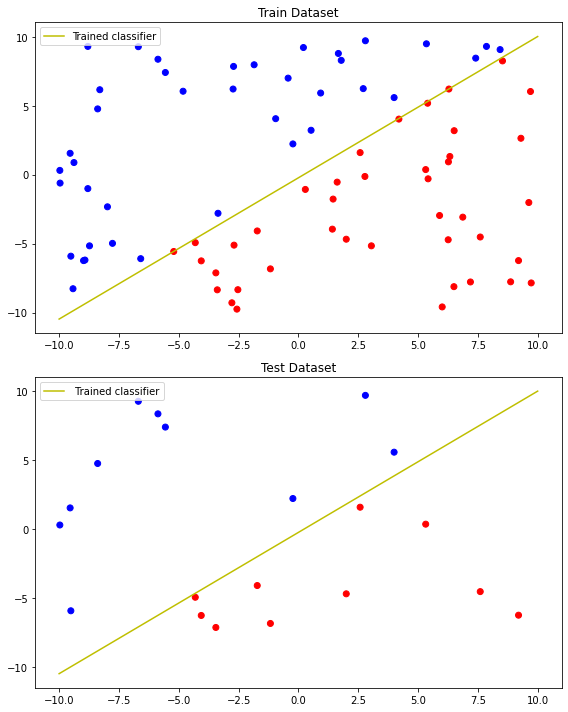

In [5]:
color1 = ['red' if c == 1 else 'blue' for c in ytrain]
color2 = ['red' if c == 1 else 'blue' for c in ytest]

# Create Hyperplane
slope = -model.weights[0] / model.weights[1]
x = np.linspace(-10,10)
y = slope * x - (model.bias[0]) / model.weights[1]


fig =plt.figure(figsize=(8,10))
axes1 = fig.add_subplot(211)
axes2 = fig.add_subplot(212)

# Plot train dataset
axes1.scatter(Xtrain[:,0], Xtrain[:,1], c = color1)
# Plot hyperplane
axes1.plot(x,y,'y',label="Trained classifier")
axes1.legend()
axes1.set_title("Train Dataset")

# Plot test dataset
axes2.scatter(Xtest[:,0], Xtest[:,1], c = color2)
# Plot hyperplane
axes2.plot(x,y,'y',label=" Trained classifier")
axes2.legend()
axes2.set_title("Test Dataset")
fig.tight_layout()
plt.show()

# Part 3
# Extra Credits

In [6]:
# load data3 requires Internet connection to load data from online database

def load_data2():
    
    url ='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(url,header = None)
    print(data)
    # make the dataset linearly separable
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', -1, 1)
    print(data)
    
    #convert to numpy ndarray
    data = data.to_numpy().astype('float32')
    
    return data
data = load_data2()


       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
       0    1    2    3  4
0    5.1  3.5  1.4  0.2 -1
1    4.9  3.0  1.4  0.2 -1
2    4.7  3.2  1.3  0.2 -1
3    4.6  3.1  1.5  0.2 -1
4    5.0  3.6  1.4  0.2 -1
..   ...  ...  ...  ... ..
145  6.7  3.0  5.2  2.3  1
146  6.3  2.5  5.0  1.9  1
147  6.5  3.0  5.2  2.0  1
148  6.2  3.4  5.4  2.3  1
149  5.9  3.0  5.1  1.8  1

[150 rows x 5 columns]


In [7]:
# Split train test data
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1],data[:,-1],test_size=0.33, random_state=42)

In [8]:
#Train the model with all 4 features

model1 = Perceptron(X_train.shape[1], 0.001)
model1.train(X_train,y_train)
model1.test(X_test,y_test)

[6.1 2.8 4.7 1.2]  Actual label:  1.0   Predicted label:  1.0
[5.7 3.8 1.7 0.3]  Actual label:  -1.0  Predicted label:  -1.0
[7.7 2.6 6.9 2.3]  Actual label:  1.0   Predicted label:  1.0
[6.  2.9 4.5 1.5]  Actual label:  1.0   Predicted label:  1.0
[6.8 2.8 4.8 1.4]  Actual label:  1.0   Predicted label:  1.0
[5.4 3.4 1.5 0.4]  Actual label:  -1.0  Predicted label:  -1.0
[5.6 2.9 3.6 1.3]  Actual label:  1.0   Predicted label:  1.0
[6.9 3.1 5.1 2.3]  Actual label:  1.0   Predicted label:  1.0
[6.2 2.2 4.5 1.5]  Actual label:  1.0   Predicted label:  1.0
[5.8 2.7 3.9 1.2]  Actual label:  1.0   Predicted label:  1.0
[6.5 3.2 5.1 2. ]  Actual label:  1.0   Predicted label:  1.0
[4.8 3.  1.4 0.1]  Actual label:  -1.0  Predicted label:  -1.0
[5.5 3.5 1.3 0.2]  Actual label:  -1.0  Predicted label:  -1.0
[4.9 3.1 1.5 0.1]  Actual label:  -1.0  Predicted label:  -1.0
[5.1 3.8 1.5 0.3]  Actual label:  -1.0  Predicted label:  -1.0
[6.3 3.3 4.7 1.6]  Actual label:  1.0   Predicted label:  1.0
[6

# we can not plot 4 feature in 2d plane. Let's use only 2 feaute and plot it. 

In [11]:
# used only first 2 features/attributes of the data set
X_train, X_test, y_train, y_test = train_test_split(data[:,:-3],data[:,-1],test_size=0.33, random_state=42)

# build, tain, test perceptron
model2 = Perceptron(X_train.shape[1], 0.001)
model2.train(X_train,y_train)
model2.test(X_test,y_test)

[6.1 2.8]        Actual label:  1.0   Predicted label:  1.0
[5.7 3.8]        Actual label:  -1.0  Predicted label:  -1.0
[7.7 2.6]        Actual label:  1.0   Predicted label:  1.0
[6.  2.9]        Actual label:  1.0   Predicted label:  1.0
[6.8 2.8]        Actual label:  1.0   Predicted label:  1.0
[5.4 3.4]        Actual label:  -1.0  Predicted label:  -1.0
[5.6 2.9]        Actual label:  1.0   Predicted label:  1.0
[6.9 3.1]        Actual label:  1.0   Predicted label:  1.0
[6.2 2.2]        Actual label:  1.0   Predicted label:  1.0
[5.8 2.7]        Actual label:  1.0   Predicted label:  1.0
[6.5 3.2]        Actual label:  1.0   Predicted label:  1.0
[4.8 3. ]        Actual label:  -1.0  Predicted label:  -1.0
[5.5 3.5]        Actual label:  -1.0  Predicted label:  -1.0
[4.9 3.1]        Actual label:  -1.0  Predicted label:  -1.0
[5.1 3.8]        Actual label:  -1.0  Predicted label:  -1.0
[6.3 3.3]        Actual label:  1.0   Predicted label:  1.0
[6.5 3. ]        Actual label:  1.

# Plot the datasets and hyperplane

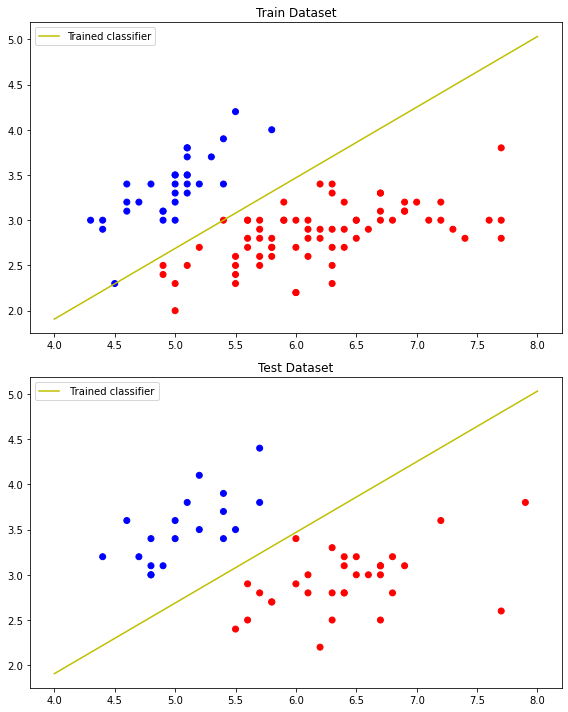

In [12]:
color1 = ['red' if c == 1 else 'blue' for c in y_train]
color2 = ['red' if c == 1 else 'blue' for c in y_test]

# Create Hyperplane
slope = -model2.weights[0] / model2.weights[1]
x = np.linspace(4,8)
y = slope * x - (model2.bias[0]) / model2.weights[1]


fig =plt.figure(figsize=(8,10))
axes1 = fig.add_subplot(211)
axes2 = fig.add_subplot(212)

# Plot train dataset
axes1.scatter(X_train[:,0], X_train[:,1], c = color1)
# Plot hyperplane
axes1.plot(x,y,'y',label="Trained classifier")
axes1.legend()
axes1.set_title("Train Dataset")

# Plot test dataset
axes2.scatter(X_test[:,0], X_test[:,1], c = color2)
# Plot hyperplane
axes2.plot(x,y,'y',label=" Trained classifier")
axes2.legend()
axes2.set_title("Test Dataset")

fig.tight_layout()
plt.show()